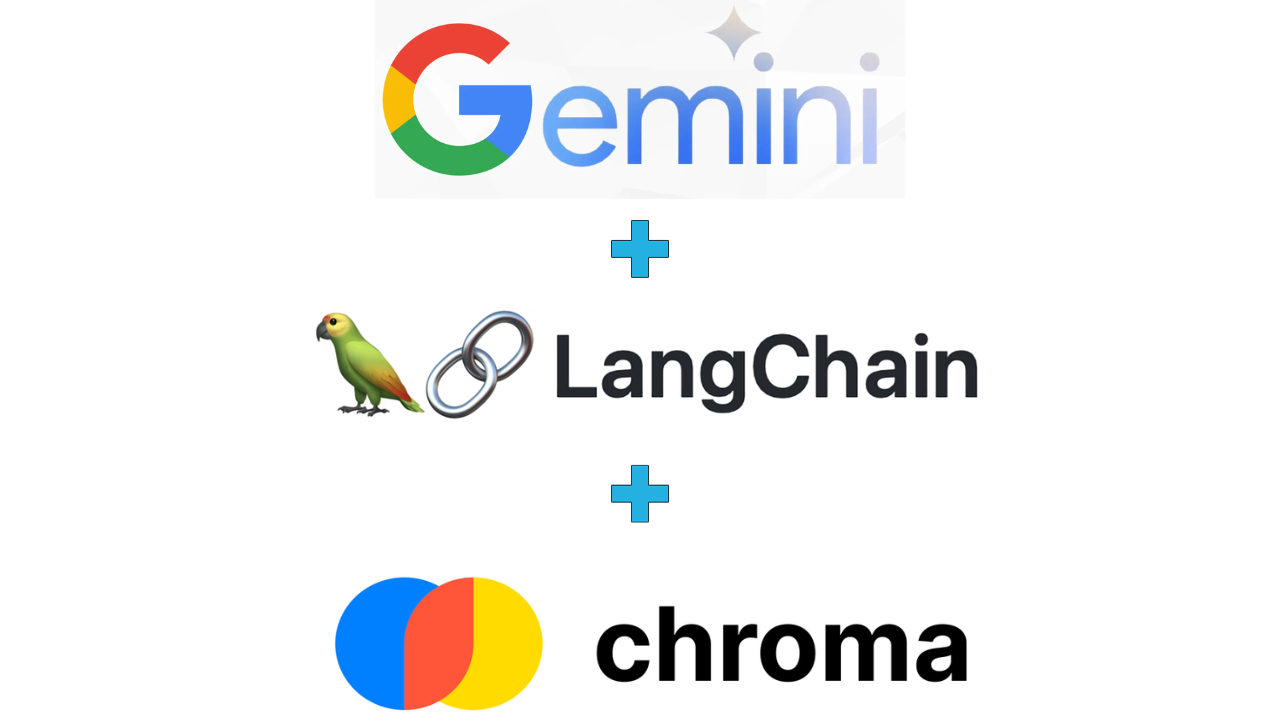

In [ ]:
!pip install -q langchain
!pip install -q pypdf
!pip install -q chromadb

In [ ]:
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

In [ ]:
!mkdir PDFS

In [ ]:
loader = PyPDFDirectoryLoader("/content/PDFS")
data = loader.load_and_split()

In [ ]:
data

[Document(page_content='P a g e  1 | 22 \n \n \n \n \n \n \nDATA SCIE NCE  \nINTE RVIEW PREPARATION  \n(30 Days o f Interview \nPreparation) \n \n \n#DAY  02', metadata={'source': '/content/PDFS/Day2.pdf', 'page': 0}),
 Document(page_content='P a g e  2 | 22 \n \nQ1. What is Logistic Regression ? \n \nAnswer: \nThe logistic regression technique involves the dependent variable , which can be represent ed in the \nbinary (0 or 1, true or false, yes or no) values, which means that the outcome could only be in either \none form of two. For example, it can be utilized when we need to find the probability of a \nsuccessful or fail event.  \n \n Logistic Regression is used when  the dependent variable ( target) is categorical.  \n \n \nModel  \nOutput = 0 or 1  \nZ = WX + B  \nhΘ(x) = sigmoid (Z)  \nhΘ(x) = log(P(X) / 1 - P(X) ) = WX +B  \n \n  \nIf ‘Z’ goes to infinity, Y(predicted) will become 1 , and if ‘Z’ goes to negative infinity, Y(predicted) \nwill beco me 0.  \nThe output from the hy

In [ ]:
print(data[4].page_content)

P a g e  5 | 22 
 
distributed recursively on the basis of attribute values 4) Which attributes are considered to be in root 
node or internal node is done by using a statistical approach . 
 
 
 
 
 
Q5. Entropy, Information Gain, Gini Index, Reducing Impurity ? 
 
Answer: 
There are diffe rent attributes which define the split of nodes in a decision tree. There are few 
algorithms to find the optimal split . 
  
1) ID3(Iterative Dichotomiser 3) :  This solution uses Entropy and Information gain as metric s 
to form a better decision tree. The attribute  with the highest information gain is used as a root 
node , and a similar approach is followed after that . Entropy is the measure that characterizes 
the impurity of an arbitrary collection of examples.  
 
 
 
 
Entropy varies from 0 to 1. 0  if all the data belong t o a single class and 1  if the class distribution is 
equal. In this way , entropy will give a measure of impurity in the dataset . 
Steps to decide which attribute to 

In [ ]:
context = "\n".join(str(p.page_content) for p in data)

In [ ]:
print("The Total Number of words in the context: ")
print(len(context))

The Total Number of words in the context: 
40228


In [ ]:
tect_splitter = RecursiveCharacterTextSplitter(
    chunk_size=10000,
    chunk_overlap=200
)

context = "\n\n".join(str(p.page_content) for p in data)

In [ ]:
texts = tect_splitter.split_text(context)

In [ ]:
print(len(texts))

5


In [ ]:
print(texts[1])

P a g e  9 | 22 
 
 
 
Q8. What is the Random Forest  Algorit hm? 
 
Answer: 
Random Forest is an ensemble machine learning algorithm that follows the bagging technique. The 
base estimators in the random forest are decision trees. Random forest randomly selects a set of 
features that are us ed to decide the best split at each node of the decision tree.  
Looking at it step -by-step, this is what a random forest model does:  
1. Random subsets are created from the original dataset ( bootstrapping ). 
2. At each node in the decision tree, only a random set o f features are considered to decide the 
best split.  
3. A decision tree model is fitted on each of the subsets.  
4. The final prediction is calculated by averaging the predictions from all decision trees.  
To sum up, the Random forest randomly selects data points and f eatures  and builds multiple trees 
(Forest) . 
Random  Forest is used for feature importance selection. The attribute  (.feature_importances_ ) is 
used to find

In [ ]:
!pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai

import os

Gemini_API = ""

In [ ]:
genai.configure(api_key=Gemini_API)

In [ ]:
os.environ['GOOGLE_API_KEY']=Gemini_API

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")

In [ ]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever()

In [ ]:
question = "What is Artificial Intelligence?"
docs = vector_index.get_relevant_documents(question)

In [ ]:
docs

[Document(page_content="Data  Science  \nInterview  Questions  \n(30 days of Interview  Preparation)\n\nINEURON.AI  \n \n Page 2 \n  \nQ1.  What is the difference between AI,  Data  Science , ML, and DL ? \n \nAns 1 :  \n         \n  \n \nArtificial Intelligence : AI is purely math and scientific exercis e, but when it became computa tional , it \nstarted to solve human problems formalized into a subset of computer science. A rtificial intelligence has \nchanged the original computational statistics paradigm to the modern idea that machines could mimic \nactual human capabilities, such as deci sion making and perfo rming more “human” tasks. Modern AI into \ntwo categories  \n1. General AI - Planning, decision making, identifying objects, recognizing sounds, social & \nbusiness transactions  \n2. Applied AI - driverless/ Autonomous car or machine smartly trade st ocks \n \nMachine Learning : Instead of engineers “teaching” or programming computers to have what they need \nto carry out t

In [ ]:
prompt_template = """
  Answer the question as detailed as possible from the provided context, make sure to provide all the details, if the answer is not in
  provided context just say, "answer is not available in the context", don't provide the wrong answer\n\n
  Context:\n {context}?\n
  Question: \n{question}\n

  Answer:
"""

In [ ]:
prompt = PromptTemplate(
    template=prompt_template,
    input_variables=['context','question']
)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3)


In [ ]:
chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

In [ ]:

response = chain(
    {"input_documents":docs, "question": question}
    , return_only_outputs=True)

In [ ]:
response['output_text']

'Artificial Intelligence is a field of computer science that focuses on creating machines that can simulate human intelligence. It involves the development of algorithms and techniques that enable computers to perform tasks that typically require human intelligence, such as understanding natural language, recognizing patterns, making decisions, and solving problems.'